# Import Data from Google Drive and load in all nessary packages

In [48]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Packages for Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
churn = pd.read_excel('/content/drive/MyDrive/FYP_Data/Telco_customer_churn.xlsx')
demo = pd.read_excel('/content/drive/MyDrive/FYP_Data/Telco_customer_churn_demographics.xlsx')
loc = pd.read_excel('/content/drive/MyDrive/FYP_Data/Telco_customer_churn_location.xlsx')
serv = pd.read_excel('/content/drive/MyDrive/FYP_Data/Telco_customer_churn_services.xlsx')
stat = pd.read_excel('/content/drive/MyDrive/FYP_Data/Telco_customer_churn_status.xlsx')
pd.set_option('max_columns', None)

Check Data is loaded into Colab/ IDE

In [9]:
print('Telco Customer Churn Table')
display(churn.head())
print('\n\nTelco Customer Demographics Table')
display(demo.head())
print('\n\nTelco Customer Location Table')
display(loc.head())
print('\n\nTelco Customer Service Table')
display(serv.head())
print('\n\nTelco Customer Status Table')
display(stat.head())

Telco Customer Churn Table


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1.0,United States,California,Los Angeles,90003.0,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1.0,86.0,3239.0,Competitor made better offer
1,9237-HQITU,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1.0,67.0,2701.0,Moved
2,9305-CDSKC,1.0,United States,California,Los Angeles,90006.0,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1.0,86.0,5372.0,Moved
3,7892-POOKP,1.0,United States,California,Los Angeles,90010.0,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1.0,84.0,5003.0,Moved
4,0280-XJGEX,1.0,United States,California,Los Angeles,90015.0,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1.0,89.0,5340.0,Competitor had better devices




Telco Customer Demographics Table


,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1




Telco Customer Location Table


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188




Telco Customer Service Table


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1.0,Q3,No,0.0,1.0,None,No,0.00,No,Yes,DSL,8.0,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20.0,0.00,59.65
1,7495-OOKFY,1.0,Q3,Yes,1.0,8.0,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0.0,390.80,1024.10
2,1658-BYGOY,1.0,Q3,No,0.0,18.0,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0.0,203.94,1910.88
3,4598-XLKNJ,1.0,Q3,Yes,1.0,25.0,Offer C,Yes,19.76,No,Yes,Fiber Optic,12.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07
4,4846-WHAFZ,1.0,Q3,Yes,1.0,37.0,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36




Telco Customer Status Table


,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Churn Value
0,8779-QRDMV,1.0,Q3,3.0,Churned,Yes,91.0,5433.0,Competitor,Competitor offered more data,1.0
1,7495-OOKFY,1.0,Q3,3.0,Churned,Yes,69.0,5302.0,Competitor,Competitor made better offer,1.0
2,1658-BYGOY,1.0,Q3,2.0,Churned,Yes,81.0,3179.0,Competitor,Competitor made better offer,1.0
3,4598-XLKNJ,1.0,Q3,2.0,Churned,Yes,88.0,5337.0,Dissatisfaction,Limited range of services,1.0
4,4846-WHAFZ,1.0,Q3,2.0,Churned,Yes,67.0,2793.0,Price,Extra data charges,1.0


# Merge Table and Drop Unused Attributes

In [10]:
mergedData = pd.merge(demo,serv, on = 'Customer ID')
mergedData_1 = pd.merge(loc,mergedData,on = 'Customer ID')
mergedData_2 = pd.merge(mergedData_1,stat,on = 'Customer ID')
# drop duplicates
mergedData_2 = mergedData_2.drop(['Count_x','Count_y','Quarter_y'], axis=1)
# Renaming Quarter
mergedData_2.columns = mergedData_2.columns.str.replace('_x', '')
newChurn = mergedData_2.copy()
newChurn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Count_x'} in the result is deprecated and will raise a MergeError in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Churn Value
0,8779-QRDMV,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,78,No,Yes,No,No,0,Q3,No,0.0,1.0,None,No,0.00,No,Yes,DSL,8.0,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20.0,0.00,59.65,3.0,Churned,Yes,91.0,5433.0,Competitor,Competitor offered more data,1.0
1,7495-OOKFY,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Female,74,No,Yes,Yes,Yes,1,Q3,Yes,1.0,8.0,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0.0,390.80,1024.10,3.0,Churned,Yes,69.0,5302.0,Competitor,Competitor made better offer,1.0
2,1658-BYGOY,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Male,71,No,Yes,No,Yes,3,Q3,No,0.0,18.0,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0.0,203.94,1910.88,2.0,Churned,Yes,81.0,3179.0,Competitor,Competitor made better offer,1.0
3,4598-XLKNJ,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Female,78,No,Yes,Yes,Yes,1,Q3,Yes,1.0,25.0,Offer C,Yes,19.76,No,Yes,Fiber Optic,12.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07,2.0,Churned,Yes,88.0,5337.0,Dissatisfaction,Limited range of services,1.0
4,4846-WHAFZ,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Female,80,No,Yes,Yes,Yes,1,Q3,Yes,1.0,37.0,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36,2.0,Churned,Yes,67.0,2793.0,Price,Extra data charges,1.0


Making sure that churn table and new churn table has the same churn lable for same customer by comparing the first 5 rows of new churn table


In [13]:
print('First 5 rows of merged table')
display(newChurn.head())
print('\n\nRows correlate to first 5 rows of merge table')
display(churn.loc[(churn['CustomerID']=='8779-QRDMV') | (churn['CustomerID']=='7495-OOKFY') | (churn['CustomerID']=='1658-BYGOY') | (churn['CustomerID']=='4598-XLKNJ') | (churn['CustomerID']=='4846-WHAFZ')])

First 5 rows of merged table


,Customer ID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Churn Value
0,8779-QRDMV,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,78,No,Yes,No,No,0,Q3,No,0.0,1.0,None,No,0.00,No,Yes,DSL,8.0,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20.0,0.00,59.65,3.0,Churned,Yes,91.0,5433.0,Competitor,Competitor offered more data,1.0
1,7495-OOKFY,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Female,74,No,Yes,Yes,Yes,1,Q3,Yes,1.0,8.0,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0.0,390.80,1024.10,3.0,Churned,Yes,69.0,5302.0,Competitor,Competitor made better offer,1.0
2,1658-BYGOY,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,Male,71,No,Yes,No,Yes,3,Q3,No,0.0,18.0,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0.0,203.94,1910.88,2.0,Churned,Yes,81.0,3179.0,Competitor,Competitor made better offer,1.0
3,4598-XLKNJ,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,Female,78,No,Yes,Yes,Yes,1,Q3,Yes,1.0,25.0,Offer C,Yes,19.76,No,Yes,Fiber Optic,12.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0.0,494.00,2995.07,2.0,Churned,Yes,88.0,5337.0,Dissatisfaction,Limited range of services,1.0
4,4846-WHAFZ,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,Female,80,No,Yes,Yes,Yes,1,Q3,Yes,1.0,37.0,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0.0,234.21,3102.36,2.0,Churned,Yes,67.0,2793.0,Price,Extra data charges,1.0




Rows correlate to first 5 rows of merge table


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
6,8779-QRDMV,1.0,United States,California,Los Angeles,90022.0,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1.0,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1.0,91.0,5433.0,Competitor offered more data
16,7495-OOKFY,1.0,United States,California,Los Angeles,90063.0,"34.044271, -118.185237",34.044271,-118.185237,Female,Yes,Yes,Yes,8.0,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.3,Yes,1.0,69.0,5302.0,Competitor made better offer
17,1658-BYGOY,1.0,United States,California,Los Angeles,90065.0,"34.108833, -118.229715",34.108833,-118.229715,Male,Yes,No,Yes,18.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,1.0,81.0,3179.0,Competitor made better offer
23,4598-XLKNJ,1.0,United States,California,Inglewood,90303.0,"33.936291, -118.332639",33.936291,-118.332639,Female,Yes,Yes,Yes,25.0,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.5,Yes,1.0,88.0,5337.0,Limited range of services
26,4846-WHAFZ,1.0,United States,California,Whittier,90602.0,"33.972119, -118.020188",33.972119,-118.020188,Female,Yes,Yes,Yes,37.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes,1.0,67.0,2793.0,Extra data charges


In [14]:
newChurn = newChurn.drop(['Customer ID','Country','State','City','Zip Code','Lat Long','Latitude','Longitude',      # Churn Label is dropped later as it will be used for Visuallisation
                          'Quarter', 'Customer Status','Churn Score','Churn Category','Churn Reason','Under 30',
                          'Senior Citizen', 'Number of Dependents', 'Number of Referrals','Avg Monthly Long Distance Charges', 
                          'Internet Service','Avg Monthly GB Download','Total Refunds','Total Extra Data Charges','Total Long Distance Charges',], axis=1)
newChurn.head()

,Gender,Age,Married,Dependents,Referred a Friend,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,Churn Label,CLTV,Churn Value
0,Male,78,No,No,No,1.0,None,No,No,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,59.65,3.0,Yes,5433.0,1.0
1,Female,74,Yes,Yes,Yes,8.0,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,1024.10,3.0,Yes,5302.0,1.0
2,Male,71,No,Yes,No,18.0,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1910.88,2.0,Yes,3179.0,1.0
3,Female,78,Yes,Yes,Yes,25.0,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,2995.07,2.0,Yes,5337.0,1.0
4,Female,80,Yes,Yes,Yes,37.0,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,3102.36,2.0,Yes,2793.0,1.0


# Exploratory Data Analysis (EDA)

In [45]:
newChurn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   int64  
 1   Age                     7043 non-null   int64  
 2   Married                 7043 non-null   int64  
 3   Dependents              7043 non-null   int64  
 4   Referred a Friend       7043 non-null   int64  
 5   Tenure in Months        7043 non-null   float64
 6   Offer                   7043 non-null   int64  
 7   Phone Service           7043 non-null   int64  
 8   Multiple Lines          7043 non-null   int64  
 9   Internet Type           7043 non-null   int64  
 10  Online Security         7043 non-null   int64  
 11  Online Backup           7043 non-null   int64  
 12  Device Protection Plan  7043 non-null   int64  
 13  Premium Tech Support    7043 non-null   int64  
 14  Streaming TV            7043 non-null   

### Checking For null or ducplicated values

In [46]:
newChurn.isna().sum()

Gender                    0
Age                       0
Married                   0
Dependents                0
Referred a Friend         0
Tenure in Months          0
Offer                     0
Phone Service             0
Multiple Lines            0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charge            0
Total Charges             0
Total Revenue             0
Satisfaction Score        0
CLTV                      0
Churn Value               0
dtype: int64

In [47]:
newChurn.duplicated().sum()

0

### Visualize Categorical Data - Bar Plot

Barplot for Categorical Variables

Churn Label  Gender
No           Male      2625
             Female    2549
Yes          Female     939
             Male       930
dtype: int64 

Churn Label  Married
No           Yes        2733
             No         2441
Yes          No         1200
             Yes         669
dtype: int64 

Churn Label  Dependents
No           No            3653
Yes          No            1763
No           Yes           1521
Yes          Yes            106
dtype: int64 

Churn Label  Referred a Friend
No           Yes                  2598
             No                   2576
Yes          No                   1245
             Yes                   624
dtype: int64 

Churn Label  Offer  
No           None       2826
Yes          None       1051
No           Offer B     723
             Offer A     485
             Offer D     441
Yes          Offer E     426
No           Offer E     379
             Offer C     320
Yes          Offer D     161
             Of

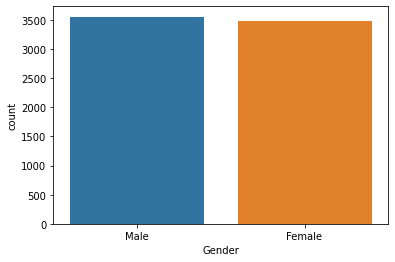

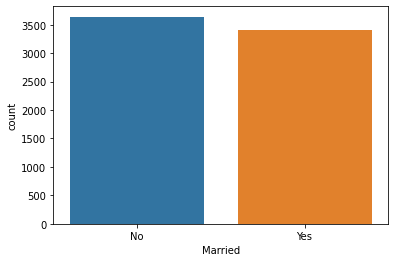

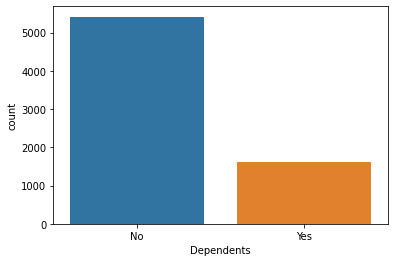

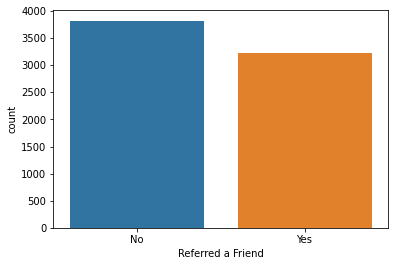

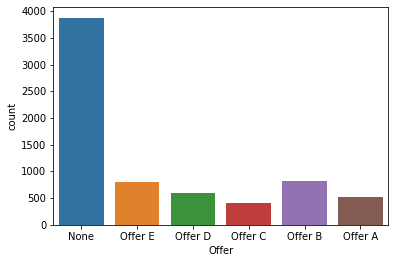

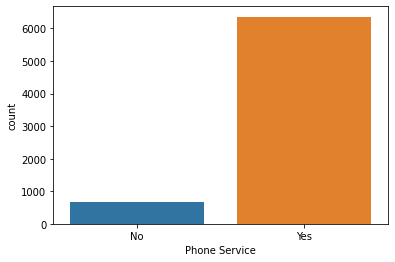

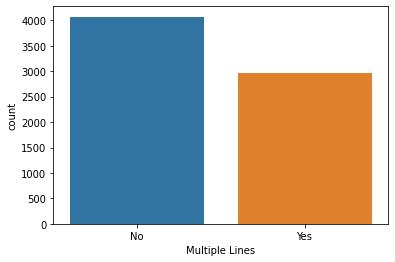

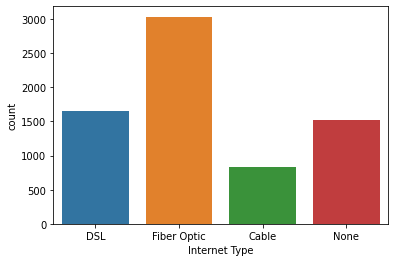

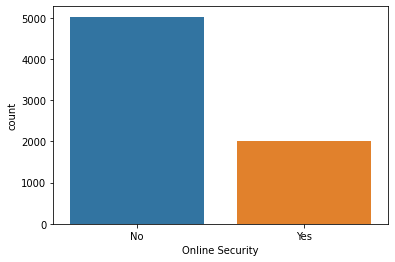

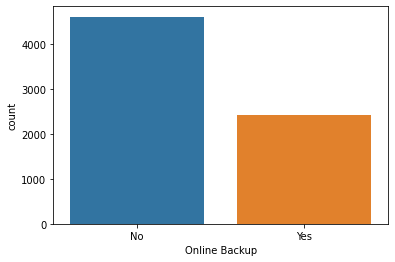

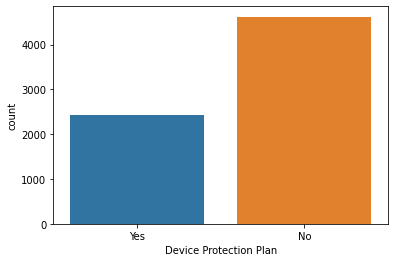

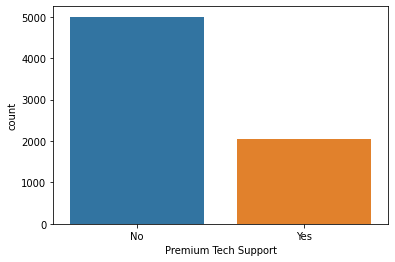

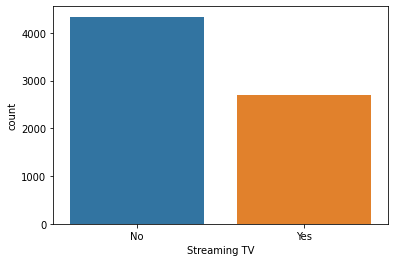

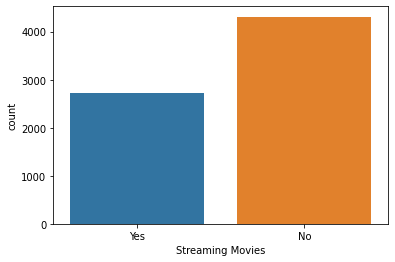

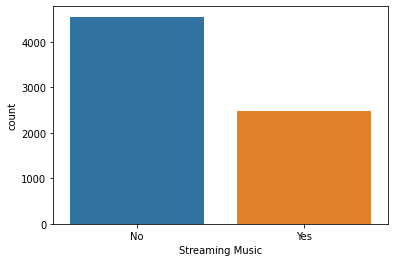

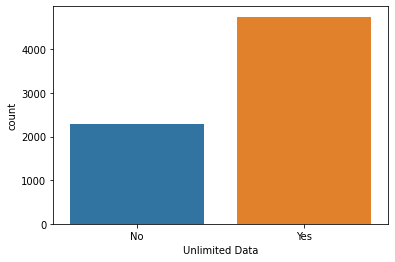

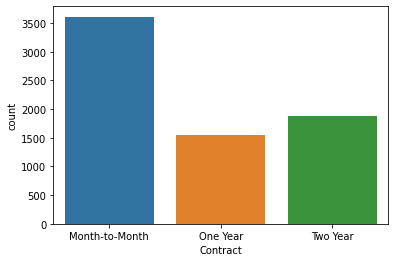

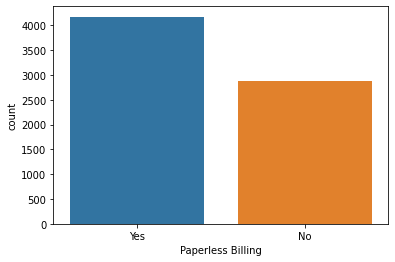

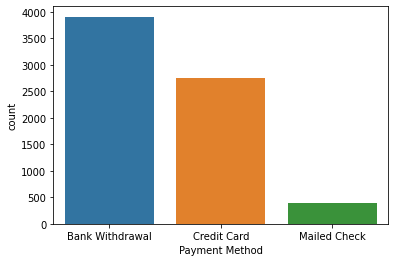

In [18]:
categorical_cols = [  # List columns of categorical data type
    'Gender',
    'Married',
    'Dependents',
    'Referred a Friend',
    'Offer',
    'Phone Service',
    'Multiple Lines',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Contract',
    'Paperless Billing',
    'Payment Method']

print('Barplot for Categorical Variables\n')
for col in categorical_cols:
  fig = plt.figure()
  image = sns.countplot(x=newChurn[col])
  print(newChurn[['Churn Label',col]].value_counts(),'\n')
  fig.savefig(col)

### Visualize Numerical Data - BoxPlot

Boxplot for Numerical Variables

Churn Label = Yes


count    1869.000000
mean       49.735688
std        17.604893
min        19.000000
25%        35.000000
50%        50.000000
75%        65.000000
max        80.000000
Name: Age, dtype: float64


Churn Label = No


count    5174.000000
mean       45.344414
std        16.276025
min        19.000000
25%        32.000000
50%        45.000000
75%        58.000000
max        80.000000
Name: Age, dtype: float64


Churn Label = Yes


count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure in Months, dtype: float64


Churn Label = No


count    5174.000000
mean       37.591225
std        24.085029
min         1.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tenure in Months, dtype: float64


Churn Label = Yes


count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: Monthly Charge, dtype: float64


Churn Label = No


count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: Monthly Charge, dtype: float64


Churn Label = Yes


count    1869.000000
mean     4149.414660
std      1189.370707
min      2003.000000
25%      3101.000000
50%      4238.000000
75%      5166.000000
max      6484.000000
Name: CLTV, dtype: float64


Churn Label = No


count    5174.000000
mean     4490.921337
std      1167.703198
min      2003.000000
25%      3643.750000
50%      4620.000000
75%      5434.750000
max      6500.000000
Name: CLTV, dtype: float64

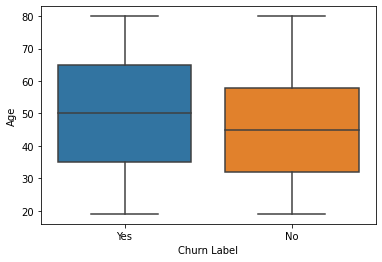

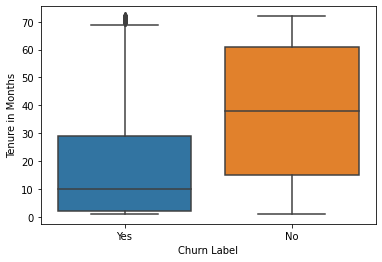

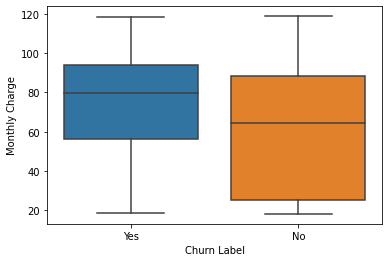

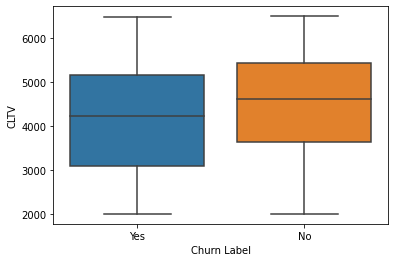

In [38]:
numerical_cols = [  # List columns of numerical data type
    'Age',
    'Tenure in Months',
    'Monthly Charge',
    'CLTV']

print('Boxplot for Numerical Variables')
for col in numerical_cols:
  fig = plt.figure()
  print('\nChurn Label = Yes')
  display(newChurn.loc[newChurn['Churn Label']=='Yes',col].describe())
  print('\nChurn Label = No')
  display(newChurn.loc[newChurn['Churn Label']=='No',col].describe())
  image = sns.boxplot(x=newChurn['Churn Label'],y=newChurn[col])
  fig.savefig(col)

Churn Label = Yes


,Total Revenue
count,1869.000000
mean,1971.353569
std,2438.441813
min,21.610000
25%,175.850000
50%,893.550000
75%,2888.760000
max,11195.440000


Churn Label = No


,Total Revenue
count,5174.000000
mean,3418.374927
std,2910.764954
min,21.360000
25%,938.575000
50%,2579.325000
75%,5463.415000
max,11979.340000


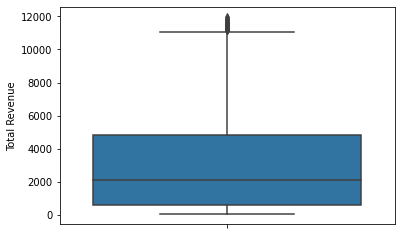

In [33]:
sns.boxplot(y=newChurn['Total Revenue'])
print('Churn Label = Yes')
display(newChurn.loc[newChurn['Churn Label']=='Yes',['Total Revenue']].describe())
print('Churn Label = No')
display(newChurn.loc[newChurn['Churn Label']=='No',['Total Revenue']].describe())

### Histogram

Histogram for Remaining Variables

Churn Label = Yes


count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Total Charges, dtype: float64


Churn Label = No


count    5174.000000
mean     2550.792103
std      2329.091754
min        18.800000
25%       574.387500
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: Total Charges, dtype: float64


Churn Label = Yes


count     1869.000000
mean      1971.353569
std       2438.441813
min         21.610000
25%        175.850000
50%        893.550000
75%       2888.760000
max      11195.440000
Name: Total Revenue, dtype: float64


Churn Label = No


count     5174.000000
mean      3418.374927
std       2910.764954
min         21.360000
25%        938.575000
50%       2579.325000
75%       5463.415000
max      11979.340000
Name: Total Revenue, dtype: float64


Churn Label = Yes


count    1869.000000
mean        1.736223
std         0.808466
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: Satisfaction Score, dtype: float64


Churn Label = No


count    5174.000000
mean        3.789911
std         0.781162
min         3.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Satisfaction Score, dtype: float64

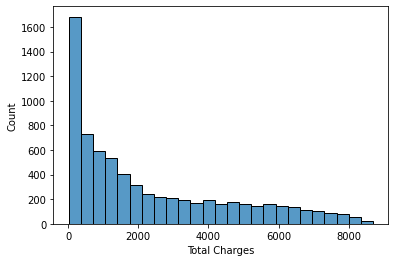

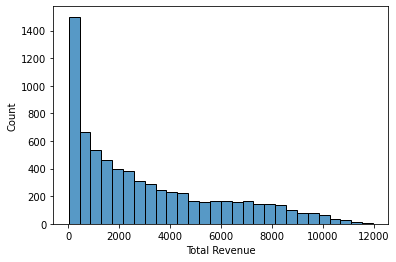

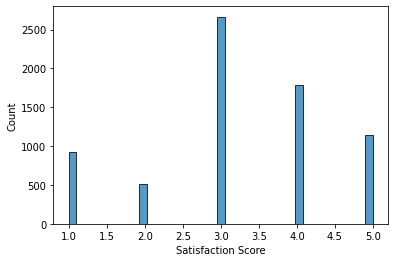

In [39]:
other_cols = [      # List columns of other attributes that cannot is not suitable for barplot and boxplot
    'Total Charges',
    'Total Revenue',
    'Satisfaction Score'
]

print('Histogram for Remaining Variables')
for col in other_cols:
  fig = plt.figure()
  print('\nChurn Label = Yes')
  display(newChurn.loc[newChurn['Churn Label']=='Yes',col].describe())
  print('\nChurn Label = No')
  display(newChurn.loc[newChurn['Churn Label']=='No',col].describe())
  image = sns.histplot(data=newChurn, x=col)
  fig.savefig(col)

### Target Variable = Churn Value

0.0    5174
1.0    1869
Name: Churn Value, dtype: int64

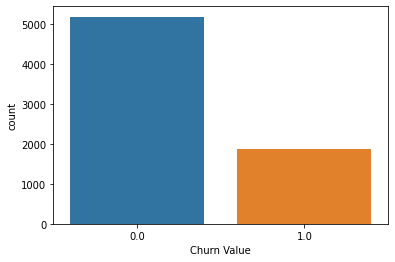

In [40]:
sns.countplot(x=newChurn['Churn Value'])
newChurn['Churn Value'].value_counts()

# Data Transformation

Dropping Churn Label

In [41]:
newChurn = newChurn.drop('Churn Label', axis=1)
newChurn.head()

,Gender,Age,Married,Dependents,Referred a Friend,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,CLTV,Churn Value
0,Male,78,No,No,No,1.0,None,No,No,DSL,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,59.65,3.0,5433.0,1.0
1,Female,74,Yes,Yes,Yes,8.0,Offer E,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,1024.10,3.0,5302.0,1.0
2,Male,71,No,Yes,No,18.0,Offer D,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,1910.88,2.0,3179.0,1.0
3,Female,78,Yes,Yes,Yes,25.0,Offer C,Yes,No,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,2995.07,2.0,5337.0,1.0
4,Female,80,Yes,Yes,Yes,37.0,Offer C,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,3102.36,2.0,2793.0,1.0


### Replacing Outliers - Total Revenue

In [42]:
newChurn['Total Revenue'].describe() # Before

count     7043.000000
mean      3034.379056
std       2865.204542
min         21.360000
25%        605.610000
50%       2108.640000
75%       4801.145000
max      11979.340000
Name: Total Revenue, dtype: float64

In [43]:
newChurn['Total Revenue'] = np.where(newChurn['Total Revenue'] > 7201.7175, 2108.640000, newChurn['Total Revenue'])
newChurn['Total Revenue'].describe() # After

count    7043.000000
mean     2236.008982
std      1906.681269
min        21.360000
25%       605.610000
50%      2108.640000
75%      3244.125000
max      7196.980000
Name: Total Revenue, dtype: float64

### Label Encoding

In [44]:
newChurn['Gender'] = pd.factorize(newChurn['Gender'])[0]
newChurn['Married'] = pd.factorize(newChurn['Married'])[0]
newChurn['Dependents'] = pd.factorize(newChurn['Dependents'])[0]
newChurn['Referred a Friend'] = pd.factorize(newChurn['Referred a Friend'])[0]
newChurn['Offer'] = pd.factorize(newChurn['Offer'])[0]
newChurn['Phone Service'] = pd.factorize(newChurn['Phone Service'])[0]
newChurn['Multiple Lines'] = pd.factorize(newChurn['Multiple Lines'])[0]
newChurn['Internet Type'] = pd.factorize(newChurn['Internet Type'])[0]
newChurn['Online Security'] = pd.factorize(newChurn['Online Security'])[0]
newChurn['Online Backup'] = pd.factorize(newChurn['Online Backup'])[0]
newChurn['Device Protection Plan'] = pd.factorize(newChurn['Device Protection Plan'])[0]
newChurn['Premium Tech Support'] = pd.factorize(newChurn['Premium Tech Support'])[0]
newChurn['Streaming TV'] = pd.factorize(newChurn['Streaming TV'])[0]
newChurn['Streaming Movies'] = pd.factorize(newChurn['Streaming Movies'])[0]
newChurn['Streaming Music'] = pd.factorize(newChurn['Streaming Music'])[0]
newChurn['Unlimited Data'] = pd.factorize(newChurn['Unlimited Data'])[0]
newChurn['Contract'] = pd.factorize(newChurn['Contract'])[0]
newChurn['Paperless Billing'] = pd.factorize(newChurn['Paperless Billing'])[0]
newChurn['Payment Method'] = pd.factorize(newChurn['Payment Method'])[0]
newChurn.head()

,Gender,Age,Married,Dependents,Referred a Friend,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,CLTV,Churn Value
0,0,78,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.65,39.65,59.65,3.0,5433.0,1.0
1,1,74,1,1,1,8.0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,1,80.65,633.30,1024.10,3.0,5302.0,1.0
2,0,71,0,1,0,18.0,2,1,1,1,0,0,1,0,1,0,1,1,0,0,0,95.45,1752.55,1910.88,2.0,3179.0,1.0
3,1,78,1,1,1,25.0,3,1,0,1,0,1,0,0,1,0,0,1,0,0,0,98.50,2514.50,2995.07,2.0,5337.0,1.0
4,1,80,1,1,1,37.0,3,1,1,1,0,0,1,0,0,1,0,1,0,0,0,76.50,2868.15,3102.36,2.0,2793.0,1.0


### Seperate TV and DV into two Data Frame

In [49]:
x = newChurn[newChurn.columns[0:26]]
y = newChurn[newChurn.columns[26]]

In [51]:
x.head()

,Gender,Age,Married,Dependents,Referred a Friend,Tenure in Months,Offer,Phone Service,Multiple Lines,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Revenue,Satisfaction Score,CLTV
0,0,78,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39.65,39.65,59.65,3.0,5433.0
1,1,74,1,1,1,8.0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,1,80.65,633.30,1024.10,3.0,5302.0
2,0,71,0,1,0,18.0,2,1,1,1,0,0,1,0,1,0,1,1,0,0,0,95.45,1752.55,1910.88,2.0,3179.0
3,1,78,1,1,1,25.0,3,1,0,1,0,1,0,0,1,0,0,1,0,0,0,98.50,2514.50,2995.07,2.0,5337.0
4,1,80,1,1,1,37.0,3,1,1,1,0,0,1,0,0,1,0,1,0,0,0,76.50,2868.15,3102.36,2.0,2793.0


In [53]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    0.0
7042    0.0
Name: Churn Value, Length: 7043, dtype: float64

### Class Balancing

0.0    5174
1.0    1869
Name: Churn Value, dtype: int64

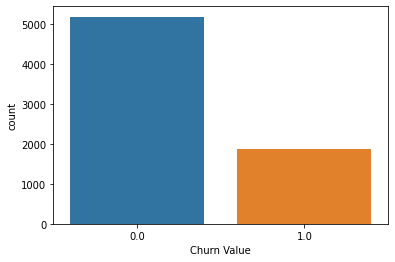

In [54]:
sns.countplot(x=y)    # Before
y.value_counts()

1.0    5174
0.0    5174
Name: Churn Value, dtype: int64

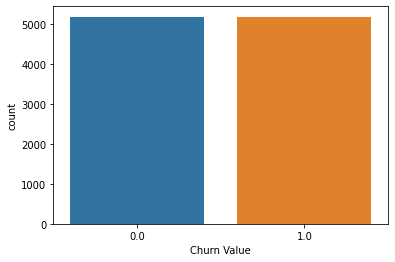

In [55]:
x_b, y_b = SMOTE().fit_resample(x,y)
sns.countplot(x=y_b)    # After
y_b.value_counts()

### Normalization

In [56]:
norm = MinMaxScaler().fit(x_b)
xb_norm = norm.transform(x_b)
xb_norm

array([[0.        , 0.96721311, 0.        , ..., 0.00533612, 0.5       ,
        0.76273071],
       [1.        , 0.90163934, 1.        , ..., 0.13974263, 0.5       ,
        0.73360018],
       [0.        , 0.85245902, 0.        , ..., 0.26332498, 0.25      ,
        0.26150767],
       ...,
       [0.        , 0.36065574, 1.        , ..., 0.29088497, 0.20978786,
        0.93053625],
       [1.        , 0.49180328, 0.        , ..., 0.01191608, 0.33301295,
        0.00155788],
       [0.        , 0.83606557, 0.        , ..., 0.01057424, 0.12117881,
        0.31910162]])

### Data Splitting

In [57]:
x_train, x_test, y_train, y_test = train_test_split(xb_norm, y_b, test_size = 0.2, random_state = 123)

In [58]:
x_train.shape

(8278, 26)

In [59]:
y_test.shape

(2070,)

# Model Buliding and Optimization

### Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [62]:
print('Accuracy of the LR model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the LR model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the LR model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the LR model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the LR model: \n', classification_report(y_test, y_pred))

Accuracy of the LR model:  95.5072463768116 %
Precision of the LR model:  0.9590409590409591
Recall of the LR model:  0.9486166007905138
F1 Score of the LR model:  0.9538002980625931
Classification Report of the LR model: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1058
         1.0       0.96      0.95      0.95      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.95      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Hyper Parameter Tuning

In [ ]:
lr_parm = {'C': [.1, 1, 10],
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear']}
lr_grid = GridSearchCV(lr, lr_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)
lr_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', lr_grid.best_params_)
print('Best Accuracy    :', lr_grid.best_score_*100)

Logistic Regression After Hyper Parameter Tuning

In [63]:
HTlr = LogisticRegression(C=10, penalty = 'l1',solver = 'liblinear')
HTlr.fit(x_train, y_train)
y_pred = HTlr.predict(x_test)

In [64]:
print('Accuracy of the Hyper Tuned LR model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Hyper Tuned LR model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Hyper Tuned LR model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Hyper Tuned LR model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Hyper Tuned LR model: \n', classification_report(y_test, y_pred))

Accuracy of the Hyper Tuned LR model:  95.89371980676329 %
Precision of the Hyper Tuned LR model:  0.9621136590229312
Recall of the Hyper Tuned LR model:  0.9535573122529645
F1 Score of the Hyper Tuned LR model:  0.9578163771712159
Classification Report of the Hyper Tuned LR model: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1058
         1.0       0.96      0.95      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Differnce Between two parameters

In [65]:
pd.DataFrame({'UnTuned LR':lr.get_params(),'Tuned LR':HTlr.get_params()})

,UnTuned LR,Tuned LR
C,1.0,10
class_weight,None,None
dual,False,False
fit_intercept,True,True
intercept_scaling,1,1
l1_ratio,None,None
max_iter,100,100
multi_class,auto,auto
n_jobs,None,None
penalty,l2,l1


### SVM (Support Vector Machine)

In [69]:
svm = LinearSVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test) 
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [70]:
print('Accuracy of the SVM model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the SVM model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the SVM model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the SVM model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the SVM model: \n', classification_report(y_test, y_pred))

Accuracy of the SVM model:  95.60386473429952 %
Precision of the SVM model:  0.9618856569709128
Recall of the SVM model:  0.9476284584980237
F1 Score of the SVM model:  0.9547038327526133
Classification Report of the SVM model: 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1058
         1.0       0.96      0.95      0.95      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Hyper Parameter Tuning

In [ ]:
svm_parm = {'C': [.1, 1, 10],
          'penalty': ['l1', 'l2'],
          'loss':['hinge'],
          'multi_class': ['ovr', 'crammer_singer']}

svm_grid = GridSearchCV(svm, svm_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

svm_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', svm_grid.best_params_)
print('Best Accuracy    :', svm_grid.best_score_*100)

SVM after Hyper Parameter Tuning

In [71]:
HTsvm = LinearSVC(C=10,loss='hinge',multi_class='crammer_singer',penalty='l1')
HTsvm.fit(x_train, y_train)
y_pred = HTsvm.predict(x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [72]:
print('Accuracy of the Hyper Tuned SVM model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Hyper Tuned SVM model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Hyper Tuned SVM model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Hyper Tuned SVM model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Hyper Tuned SVM model: \n', classification_report(y_test, y_pred))

Accuracy of the Hyper Tuned SVM model:  96.08695652173913 %
Precision of the Hyper Tuned SVM model:  0.9641076769690927
Recall of the Hyper Tuned SVM model:  0.9555335968379447
F1 Score of the Hyper Tuned SVM model:  0.9598014888337469
Classification Report of the Hyper Tuned SVM model: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1058
         1.0       0.96      0.96      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Parameter difference between from the same algorithm

In [73]:
pd.DataFrame({'UnTuned SVM':svm.get_params(),'Tuned SVM':HTsvm.get_params()})

,UnTuned SVM,Tuned SVM
C,1.0,10
class_weight,None,None
dual,True,True
fit_intercept,True,True
intercept_scaling,1,1
loss,squared_hinge,hinge
max_iter,1000,1000
multi_class,ovr,crammer_singer
penalty,l2,l1
random_state,None,None


### KNN (K-Nearest Neighbors)

In [74]:
neigh = KNeighborsClassifier()
neigh.fit(x_test,y_test)
y_pred = neigh.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [75]:
print('Accuracy of the KNN model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the KNN model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the KNN model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the KNN model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the KNN model: \n', classification_report(y_test, y_pred))

Accuracy of the KNN model:  90.53140096618357 %
Precision of the KNN model:  0.884180790960452
Recall of the KNN model:  0.9278656126482213
F1 Score of the KNN model:  0.9054966248794601
Classification Report of the KNN model: 
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.91      1058
         1.0       0.88      0.93      0.91      1012

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070



Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_parm = {'n_neighbors': [3, 4, 5, 6, 7],
            'p': [1, 2]}

knn_grid = GridSearchCV(neigh, knn_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

knn_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', knn_grid.best_params_)
print('Best Accuracy    :', knn_grid.best_score_*100)

KNN after Hyper Parameter Tuning

In [76]:
HTneigh = KNeighborsClassifier(n_neighbors=6,p=1)
HTneigh.fit(x_test,y_test)
y_pred = HTneigh.predict(x_test)

In [77]:
print('Accuracy of the Hyper Tuned KNN model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Hyper Tuned KNN model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Hyper Tuned KNN model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Hyper Tuned KNN model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Hyper Tuned KNN model: \n', classification_report(y_test, y_pred))

Accuracy of the Hyper Tuned KNN model:  92.27053140096618 %
Precision of the Hyper Tuned KNN model:  0.9209486166007905
Recall of the Hyper Tuned KNN model:  0.9209486166007905
F1 Score of the Hyper Tuned KNN model:  0.9209486166007905
Classification Report of the Hyper Tuned KNN model: 
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      1058
         1.0       0.92      0.92      0.92      1012

    accuracy                           0.92      2070
   macro avg       0.92      0.92      0.92      2070
weighted avg       0.92      0.92      0.92      2070



Parameter difference between from the same algorithm

In [78]:
pd.DataFrame({'UnTuned KNN':neigh.get_params(),'Tuned KNN':HTneigh.get_params()})

,UnTuned KNN,Tuned KNN
algorithm,auto,auto
leaf_size,30,30
metric,minkowski,minkowski
metric_params,None,None
n_jobs,None,None
n_neighbors,5,6
p,2,1
weights,uniform,uniform


### Decision Tree

In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [80]:
print('Accuracy of the DT model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the DT model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the DT model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the DT model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the DT model: \n', classification_report(y_test, y_pred))

Accuracy of the DT model:  95.16908212560386 %
Precision of the DT model:  0.9479371316306483
Recall of the DT model:  0.9535573122529645
F1 Score of the DT model:  0.9507389162561576
Classification Report of the DT model: 
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1058
         1.0       0.95      0.95      0.95      1012

    accuracy                           0.95      2070
   macro avg       0.95      0.95      0.95      2070
weighted avg       0.95      0.95      0.95      2070



Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
dt_parm = {'criterion': ['gini','entrophy','log_loss'],
            'max_depth': [7,8,9,10,11,12]}

dt_grid = GridSearchCV(dt, dt_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

dt_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', dt_grid.best_params_)
print('Best Accuracy    :', dt_grid.best_score_*100)

Decision Tree after Hyper Parameter Tuning

In [81]:
HTdt = DecisionTreeClassifier(criterion='entropy',max_depth=9)
HTdt.fit(x_train,y_train)
y_pred = HTdt.predict(x_test)

In [82]:
print('Accuracy of the DT model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the DT model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the DT model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the DT model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the DT model: \n', classification_report(y_test, y_pred))

Accuracy of the DT model:  96.1352657004831 %
Precision of the DT model:  0.9595660749506904
Recall of the DT model:  0.9614624505928854
F1 Score of the DT model:  0.9605133267522211
Classification Report of the DT model: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1058
         1.0       0.96      0.96      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Parameter difference between from the same algorithm

In [83]:
pd.DataFrame({'UnTuned DT':dt.get_params(),'Tuned DT':HTdt.get_params()})

,UnTuned DT,Tuned DT
ccp_alpha,0.0,0.0
class_weight,None,None
criterion,gini,entropy
max_depth,None,9
max_features,None,None
max_leaf_nodes,None,None
min_impurity_decrease,0.0,0.0
min_samples_leaf,1,1
min_samples_split,2,2
min_weight_fraction_leaf,0.0,0.0


### Random Forest

In [90]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [91]:
print('Accuracy of the Random Forest model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Random Forest model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Random Forest model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Random Forest model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Random Forest model: \n', classification_report(y_test, y_pred))

Accuracy of the Random Forest model:  96.61835748792271 %
Precision of the Random Forest model:  0.9845679012345679
Recall of the Random Forest model:  0.9456521739130435
F1 Score of the Random Forest model:  0.9647177419354838
Classification Report of the Random Forest model: 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1058
         1.0       0.98      0.95      0.96      1012

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070



Hyper Parameter Tuning

In [ ]:
rf_parm = {'criterion': ['gini','entrophy','log_loss'],
            'max_depth': [7,8,9,10,11,12]}

rf_grid = GridSearchCV(rf, rf_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

rf_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', rf_grid.best_params_)
print('Best Accuracy    :', rf_grid.best_score_*100)

Random Forest after Hyper Parameter Tuning

In [92]:
HTrf = RandomForestClassifier(criterion='gini',max_depth=11, random_state=1)
HTrf.fit(x_train,y_train)
y_pred = HTrf.predict(x_test)

In [93]:
print('Accuracy of the Random Forest model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Random Forest model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Random Forest model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Random Forest model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Random Forest model: \n', classification_report(y_test, y_pred))

Accuracy of the Random Forest model:  96.71497584541063 %
Precision of the Random Forest model:  0.9845995893223819
Recall of the Random Forest model:  0.9476284584980237
F1 Score of the Random Forest model:  0.9657603222557904
Classification Report of the Random Forest model: 
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1058
         1.0       0.98      0.95      0.97      1012

    accuracy                           0.97      2070
   macro avg       0.97      0.97      0.97      2070
weighted avg       0.97      0.97      0.97      2070



Parameter difference between from the same algorithm

In [94]:
pd.DataFrame({'UnTuned Random Forest':rf.get_params(),'Tuned Random Forest':HTrf.get_params()})

,UnTuned Random Forest,Tuned Random Forest
bootstrap,True,True
ccp_alpha,0.0,0.0
class_weight,None,None
criterion,gini,gini
max_depth,None,11
max_features,auto,auto
max_leaf_nodes,None,None
max_samples,None,None
min_impurity_decrease,0.0,0.0
min_samples_leaf,1,1


### AdaBoosting

In [95]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [96]:
print('Accuracy of the AdaBoosting model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the AdaBoosting model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the AdaBoosting model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the AdaBoosting model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the AdaBoosting model: \n', classification_report(y_test, y_pred))

Accuracy of the AdaBoosting model:  95.94202898550725 %
Precision of the AdaBoosting model:  0.9649298597194389
Recall of the AdaBoosting model:  0.9515810276679841
F1 Score of the AdaBoosting model:  0.9582089552238806
Classification Report of the AdaBoosting model: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1058
         1.0       0.96      0.95      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Hyper Parameter Tuning

In [ ]:
ab_parm = { 'n_estimators':[50,75,100],
            'learning_rate': [.1,1,10],
            'algorithm': ['SAMME','SAMME.R']}

ab_grid = GridSearchCV(adaboost, ab_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

ab_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', ab_grid.best_params_)
print('Best Accuracy    :', ab_grid.best_score_*100)

AdaBoosting after Hyper Parameter Tuning

In [97]:
HTadaboost = AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=100)
HTadaboost.fit(x_train, y_train)
y_pred = HTadaboost.predict(x_test)

In [98]:
print('Accuracy of the AdaBoosting model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the AdaBoosting model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the AdaBoosting model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the AdaBoosting model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the AdaBoosting model: \n', classification_report(y_test, y_pred))

Accuracy of the AdaBoosting model:  96.08695652173913 %
Precision of the AdaBoosting model:  0.966900702106319
Recall of the AdaBoosting model:  0.9525691699604744
F1 Score of the AdaBoosting model:  0.9596814335490294
Classification Report of the AdaBoosting model: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1058
         1.0       0.97      0.95      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Parameter difference between from the same algorithm

In [99]:
pd.DataFrame({'UnTuned AdaBoosting':adaboost.get_params(),'Tuned AdaBoosting':HTadaboost.get_params()})

,UnTuned AdaBoosting,Tuned AdaBoosting
algorithm,SAMME.R,SAMME
base_estimator,None,None
learning_rate,1.0,1
n_estimators,50,100
random_state,None,None


### Gradient Boosting

In [100]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [101]:
print('Accuracy of the Gradient Boosting model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Gradient Boosting model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Gradient Boosting model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Gradient Boosting model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Gradient Boosting model: \n', classification_report(y_test, y_pred))

Accuracy of the Gradient Boosting model:  96.1352657004831 %
Precision of the Gradient Boosting model:  0.97165991902834
Recall of the Gradient Boosting model:  0.9486166007905138
F1 Score of the Gradient Boosting model:  0.96
Classification Report of the Gradient Boosting model: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1058
         1.0       0.97      0.95      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Hyper Parameter Tuning

In [ ]:
gb_parm = { 'loss': ['log_loss','deviance','exponential'],
            'learning_rate': [.1,1,10],
           'n_estimators':[50,75,100],
            'criterion': ['friedman_mse','squared_error','mse'],
           'max_features': ['auto']}

gb_grid = GridSearchCV(gbc, gb_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

gb_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', gb_grid.best_params_)
print('Best Accuracy    :', gb_grid.best_score_*100)

Gradient Boosting after Hyper Parameter Tuning

In [102]:
HTgbc = GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 1, loss= 'deviance', max_features= 'auto', n_estimators= 50)
HTgbc.fit(x_train, y_train)
y_pred = HTgbc.predict(x_test)

In [103]:
print('Accuracy of the Gradient Boosting model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the Gradient Boosting model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the Gradient Boosting model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the Gradient Boosting model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the Gradient Boosting model: \n', classification_report(y_test, y_pred))

Accuracy of the Gradient Boosting model:  96.32850241545894 %
Precision of the Gradient Boosting model:  0.968937875751503
Recall of the Gradient Boosting model:  0.9555335968379447
F1 Score of the Gradient Boosting model:  0.9621890547263683
Classification Report of the Gradient Boosting model: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1058
         1.0       0.97      0.96      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Parameter difference between from the same algorithm

In [110]:
pd.DataFrame({'UnTuned Gradient Boosting':gbc.get_params(),'Tuned Gradient Boosting':HTgbc.get_params()})

,UnTuned Gradient Boosting,Tuned Gradient Boosting
ccp_alpha,0.0,0.0
criterion,friedman_mse,friedman_mse
init,None,None
learning_rate,0.1,1
loss,deviance,deviance
max_depth,3,3
max_features,None,auto
max_leaf_nodes,None,None
min_impurity_decrease,0.0,0.0
min_samples_leaf,1,1


### MLP (Multi Layer Preceptron)

In [104]:
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Actual,Predict
5603,0.0,0.0
1112,0.0,0.0
6175,0.0,0.0
7905,1.0,1.0
6461,0.0,0.0
...,...,...
129,1.0,1.0
8633,1.0,1.0
6401,0.0,0.0
1441,1.0,1.0


In [105]:
print('Accuracy of the MLP model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the MLP model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the MLP model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the MLP model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the MLP model: \n', classification_report(y_test, y_pred))

Accuracy of the MLP model:  96.28019323671498 %
Precision of the MLP model:  0.9633300297324083
Recall of the MLP model:  0.9604743083003953
F1 Score of the MLP model:  0.9619000494804553
Classification Report of the MLP model: 
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      1058
         1.0       0.96      0.96      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Hyper Parameter Tuning

In [ ]:
mlp_parm = { 'hidden_layer_sizes': [(200,),(300,),(400,)],
            'solver': ['lbfgs','sgd','adam'],
           'max_iter':[200,300,400,500]}

mlp_grid = GridSearchCV(mlp, mlp_parm, scoring='accuracy', cv = 3, n_jobs = -1, verbose = 3)

mlp_grid.fit(x_train, y_train)

In [ ]:
print('Best parameters:', mlp_grid.best_params_)
print('Best Accuracy    :', mlp_grid.best_score_*100)

Hyper Parameter Tuning

In [106]:
HTmlp = MLPClassifier(hidden_layer_sizes=(400,),max_iter=200,solver='adam')
HTmlp.fit(x_train,y_train)
y_pred = HTmlp.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [107]:
print('Accuracy of the MLP model: ', accuracy_score(y_test, y_pred)*100,"%") # accuracy is given in precentage
print('Precision of the MLP model: ', precision_score(y_test, y_pred, average = 'binary'))
print('Recall of the MLP model: ', recall_score(y_test, y_pred, average = 'binary'))
print('F1 Score of the MLP model: ', f1_score(y_test, y_pred, average = 'binary'))

print('Classification Report of the MLP model: \n', classification_report(y_test, y_pred))

Accuracy of the MLP model:  95.79710144927536 %
Precision of the MLP model:  0.9611166500498505
Recall of the MLP model:  0.9525691699604744
F1 Score of the MLP model:  0.9568238213399504
Classification Report of the MLP model: 
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1058
         1.0       0.96      0.95      0.96      1012

    accuracy                           0.96      2070
   macro avg       0.96      0.96      0.96      2070
weighted avg       0.96      0.96      0.96      2070



Parameter difference between from the same algorithm

In [109]:
pd.DataFrame({'UnTuned MLP':mlp.get_params(),'Tuned MLP':HTmlp.get_params()})

,UnTuned MLP,Tuned MLP
activation,relu,relu
alpha,0.0001,0.0001
batch_size,auto,auto
beta_1,0.9,0.9
beta_2,0.999,0.999
early_stopping,False,False
epsilon,0.0,0.0
hidden_layer_sizes,"(100,)","(400,)"
learning_rate,constant,constant
learning_rate_init,0.001,0.001


# Checking Which variable is significant with results

In [68]:
x_new = sm.add_constant(x)

est = sm.OLS(y,x_new).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            Churn Value   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     571.3
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        04:56:27   Log-Likelihood:                -232.28
No. Observations:                7043   AIC:                             518.6
Df Residuals:                    7016   BIC:                             703.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
